# NEW ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

# magic function that renders the figure in a notebook
%matplotlib inline

In [2]:
zip_file = ZipFile('data/stack-overflow-2018-developer-survey.zip')
df_schema = pd.read_csv(zip_file.open('survey_results_schema.csv'))
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


In [3]:
print(list(df_schema['Column'])) # nasty but just so I can see the data quickly

['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'CommunicationT

In [4]:
text_data_set = 'Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age'
reduced_data_columns = text_data_set.split(',')
print(reduced_data_columns)

['Employment', 'FormalEducation', 'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf', 'SalaryType', 'ConvertedSalary', 'EducationTypes', 'SelfTaughtTypes', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem', 'Gender', 'SexualOrientation', 'RaceEthnicity', 'Age']


In [5]:
# survey_results_public.csv
df = pd.read_csv(zip_file.open('survey_results_public.csv'),low_memory=False)
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# BASIC INFO

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [7]:
df.shape # attribute

(98855, 129)

# REDUCED DATA SET (19 columns)

In [8]:
reduced_df = df[reduced_data_columns]

In [9]:
reduced_df.shape

(98855, 19)

# Find any '?' data
1. Employment
2. FormalEducation
3. UndergradMajor
4. DevType
5. YearsCoding
6. YearsCodingProf
7. SalaryType
8. ConvertedSalary
9. EducationTypes
10. SelfTaughtTypes
11. LanguageWorkedWith
12. DatabaseWorkedWith
13. PlatformWorkedWith
14. FrameworkWorkedWith
15. OperatingSystem
16. Gender
17. SexualOrientation
18. RaceEthnicity
19. Age

In [10]:
reduced_df['Employment'].unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [11]:
reduced_df['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

In [12]:
reduced_df['UndergradMajor'].unique()

array(['Mathematics or statistics',
       'A natural science (ex. biology, chemistry, physics)',
       'Computer science, computer engineering, or software engineering',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'Information systems, information technology, or system administration',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       nan, 'A business discipline (ex. accounting, finance, marketing)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'A humanities discipline (ex. literature, history, philosophy)',
       'A health science (ex. nursing, pharmacy, radiology)',
       'I never declared a major'], dtype=object)

In [13]:
reduced_df['DevType'].unique() # MULTIPLE FIELDS IN EACH COLUMN

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

In [14]:
reduced_df['YearsCoding'].unique()

array(['3-5 years', '30 or more years', '24-26 years', '18-20 years',
       '6-8 years', '9-11 years', '0-2 years', '15-17 years',
       '12-14 years', '21-23 years', '27-29 years', nan], dtype=object)

In [15]:
reduced_df['YearsCodingProf'].unique()

array(['3-5 years', '18-20 years', '6-8 years', '12-14 years',
       '0-2 years', '21-23 years', nan, '24-26 years', '9-11 years',
       '15-17 years', '27-29 years', '30 or more years'], dtype=object)

In [16]:
reduced_df['SalaryType'].unique() # HAS A NAN

array(['Monthly', 'Yearly', nan, 'Weekly'], dtype=object)

In [17]:
reduced_df['ConvertedSalary'].unique() # ALSO HAS A NAN

array([    nan,  70841.,  21426., ...,  11244., 269076.,   1584.])

# AFTER LOOKING AT UNIQUE VALUES, modify the data again
## Dropping rows of data...

In [18]:
rdf = reduced_df.dropna()

In [19]:
rdf.shape

(15791, 19)

## Recheck a dataset with NANs

In [20]:
rdf['ConvertedSalary'].unique() # ALSO HAS A NAN

array([ 70841., 120000., 250000., ...,  63696.,  29600., 297204.])

In [21]:
rdf['ConvertedSalary'].isna().head() # good I think

1     False
6     False
8     False
22    False
30    False
Name: ConvertedSalary, dtype: bool

## SPLIT UP YOUR DATA!

In [22]:
rdf['RaceEthnicity'].str.split(';',expand=True).head()

,0,1,2,3,4,5,6
1,White or of European descent,None,None,None,None,None,None
6,White or of European descent,None,None,None,None,None,None
8,White or of European descent,None,None,None,None,None,None
22,White or of European descent,None,None,None,None,None,None
30,White or of European descent,None,None,None,None,None,None


In [23]:
# The strip() method returns a copy of the string with both leading and trailing characters removed (based on the string argument passed).
rdf['RaceEthnicity'].str.split(';',expand=True).apply(lambda s: s.str.strip()).head()

,0,1,2,3,4,5,6
1,White or of European descent,None,None,None,None,None,None
6,White or of European descent,None,None,None,None,None,None
8,White or of European descent,None,None,None,None,None,None
22,White or of European descent,None,None,None,None,None,None
30,White or of European descent,None,None,None,None,None,None


In [24]:
# Stack the prescribed level(s) from columns to index.
rdf['RaceEthnicity'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack().head()

1   0    White or of European descent
6   0    White or of European descent
8   0    White or of European descent
22  0    White or of European descent
30  0    White or of European descent
dtype: object

In [25]:
# Get only the unique values. BINGO.
rdf['RaceEthnicity'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack().unique()

array(['White or of European descent', 'South Asian', 'East Asian',
       'Middle Eastern', 'Hispanic or Latino/Latina',
       'Native American, Pacific Islander, or Indigenous Australian',
       'Black or of African descent'], dtype=object)

## Create a subset of variables that

In [26]:
re_dummies = pd.get_dummies(rdf['RaceEthnicity'].str.split(';',expand=True).apply(lambda s: s.str.strip()))

In [27]:
re_dummies.head()

,0_Black or of African descent,0_East Asian,0_Hispanic or Latino/Latina,0_Middle Eastern,"0_Native American, Pacific Islander, or Indigenous Australian",0_South Asian,0_White or of European descent,1_East Asian,1_Hispanic or Latino/Latina,1_Middle Eastern,...,2_South Asian,2_White or of European descent,3_Middle Eastern,3_South Asian,3_White or of European descent,"4_Native American, Pacific Islander, or Indigenous Australian",4_White or of European descent,5_South Asian,5_White or of European descent,6_White or of European descent
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
re_dummies.shape

(15791, 26)

In [29]:
# can't do "unique"
# stack was in the wrong place!
re_dummies2 = pd.get_dummies(rdf['RaceEthnicity'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)

In [30]:
re_dummies2.head()

,Black or of African descent,East Asian,Hispanic or Latino/Latina,Middle Eastern,"Native American, Pacific Islander, or Indigenous Australian",South Asian,White or of European descent
1,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
22,0,0,0,0,0,0,1
30,0,0,0,0,0,0,1


In [31]:
rdf['RaceEthnicity'].iloc[0:3]

1    White or of European descent
6    White or of European descent
8    White or of European descent
Name: RaceEthnicity, dtype: object

# Question, can do I this for multiple columns at a time?

In [61]:
# SexualOrientation
so_dummies = pd.get_dummies(rdf['SexualOrientation'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
so_dummies.head()

,Asexual,Bisexual or Queer,Gay or Lesbian,Straight or heterosexual
1,0,0,0,1
6,0,0,0,1
8,0,0,0,1
22,0,0,0,1
30,0,0,0,1


In [34]:
emp_dummies = pd.get_dummies(rdf['Employment'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
emp_dummies.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired
1,1,0,0,0,0,0
6,1,0,0,0,0,0
8,1,0,0,0,0,0
22,1,0,0,0,0,0
30,1,0,0,0,0,0


In [35]:
formal_dummies = pd.get_dummies(rdf['FormalEducation'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
formal_dummies.head()

,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)","Professional degree (JD, MD, etc.)",Some college/university study without earning a degree
1,0,1,0,0,0,0
6,0,0,0,0,0,1
8,0,0,0,0,0,1
22,0,1,0,0,0,0
30,0,0,0,0,0,1


In [36]:
under_dummies = pd.get_dummies(rdf['UndergradMajor'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
under_dummies.head()

,"A business discipline (ex. accounting, finance, marketing)","A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design
1,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0
22,0,0,0,0,0,0,1,0,0,0,0,0
30,0,0,0,0,0,0,1,0,0,0,0,0


In [37]:
dt_dummies = pd.get_dummies(rdf['DevType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
dt_dummies.head()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
22,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
30,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## SUM IT!

In [38]:
#dt_dummies2 = pd.get_dummies(rdf['DevType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
#dt_dummies2.head()

In [39]:
yc_dummies = pd.get_dummies(rdf['YearsCoding'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
yc_dummies.head()

,0-2 years,12-14 years,15-17 years,18-20 years,21-23 years,24-26 years,27-29 years,3-5 years,30 or more years,6-8 years,9-11 years
1,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,0,0,1
30,0,0,0,0,0,0,0,1,0,0,0


In [40]:
ycp_dummies = pd.get_dummies(rdf['YearsCodingProf'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
ycp_dummies.head()

,0-2 years,12-14 years,15-17 years,18-20 years,21-23 years,24-26 years,27-29 years,3-5 years,30 or more years,6-8 years,9-11 years
1,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,1,0
30,0,0,0,0,0,0,0,1,0,0,0


In [41]:
sal_type_dummies = pd.get_dummies(rdf['SalaryType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
sal_type_dummies.head()

,Monthly,Weekly,Yearly
1,0,0,1
6,0,0,1
8,0,0,1
22,1,0,0
30,1,0,0


In [42]:
#consal_dummies = pd.get_dummies(rdf2['ConvertedSalary'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack())
#consal_dummies.head()
rdf['ConvertedSalary'].head() # whoops

1      70841.0
6     120000.0
8     250000.0
22       420.0
30     30000.0
Name: ConvertedSalary, dtype: float64

In [43]:
edu_dummies = pd.get_dummies(rdf['EducationTypes'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
edu_dummies.head()

,Completed an industry certification program (e.g. MCPD),Contributed to open source software,Participated in a full-time developer training program or bootcamp,Participated in a hackathon,"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",Received on-the-job training in software development,Taken a part-time in-person course in programming or software development,Taken an online course in programming or software development (e.g. a MOOC),"Taught yourself a new language, framework, or tool without taking a formal course"
1,0,1,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,1
8,0,1,0,1,0,0,0,1,1
22,0,0,0,0,0,0,0,0,1
30,0,0,0,0,0,1,0,0,1


In [44]:
#SelfTaughtTypes
stt_dummies = pd.get_dummies(rdf['SelfTaughtTypes'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
stt_dummies.head()

,"A book or e-book from O’Reilly, Apress, or a similar publisher",A college/university computer science or software engineering book,"Internal Wikis, chat rooms, or documentation set up by my company for employees","Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",Pre-scheduled tutoring or mentoring sessions with a friend or colleague,Questions & answers on Stack Overflow,"Tapping your network of friends, family, and peers versed in the technology",The official documentation and/or standards for the technology,The technology’s online help system
1,0,0,0,0,0,1,0,1,0
6,0,0,0,1,0,1,0,1,0
8,1,1,0,1,0,0,1,1,1
22,0,0,0,0,0,1,0,0,0
30,1,0,1,0,1,1,1,1,0


In [45]:
language_dummies = pd.get_dummies(rdf['LanguageWorkedWith'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
language_dummies.head()

,Assembly,Bash/Shell,C,C#,C++,CSS,Clojure,Cobol,CoffeeScript,Delphi/Object Pascal,...,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
22,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
30,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
db_dummies = pd.get_dummies(rdf['DatabaseWorkedWith'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
db_dummies.head()

,Amazon DynamoDB,Amazon RDS/Aurora,Amazon Redshift,Apache HBase,Apache Hive,Cassandra,Elasticsearch,Google BigQuery,Google Cloud Storage,IBM Db2,...,Memcached,"Microsoft Azure (Tables, CosmosDB, SQL, etc)",MongoDB,MySQL,Neo4j,Oracle,PostgreSQL,Redis,SQL Server,SQLite
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0


In [47]:
platform_dummies = pd.get_dummies(rdf['PlatformWorkedWith'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
platform_dummies.head()

,AWS,Amazon Echo,Android,Apple Watch or Apple TV,Arduino,Azure,Drupal,ESP8266,Firebase,Gaming console,...,Mainframe,Predix,Raspberry Pi,Salesforce,Serverless,SharePoint,Windows Desktop or Server,Windows Phone,WordPress,iOS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
framework_dummies = pd.get_dummies(rdf['FrameworkWorkedWith'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
framework_dummies.head()

,.NET Core,Angular,Cordova,Django,Hadoop,Node.js,React,Spark,Spring,TensorFlow,Torch/PyTorch,Xamarin
1,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,1,1,1,1,0,0,0,0
22,1,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
os_dummies = pd.get_dummies(rdf['OperatingSystem'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
os_dummies.head()

,BSD/Unix,Linux-based,MacOS,Windows
1,0,1,0,0
6,0,0,1,0
8,0,0,1,0
22,0,0,0,1
30,0,1,0,0


In [50]:
gender_dummies = pd.get_dummies(rdf['Gender'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack()).sum(level=0)
gender_dummies.head()

,Female,Male,"Non-binary, genderqueer, or gender non-conforming",Transgender
1,0,1,0,0
6,0,1,0,0
8,0,1,0,0
22,0,1,0,0
30,0,1,0,0


# Is there a better way to do the code above?
1. Employment
2. FormalEducation
3. UndergradMajor
4. DevType
5. YearsCoding
6. YearsCodingProf
7. SalaryType
8. ConvertedSalary
9. EducationTypes
10. SelfTaughtTypes
11. LanguageWorkedWith
12. DatabaseWorkedWith
13. PlatformWorkedWith
14. FrameworkWorkedWith
15. OperatingSystem
16. Gender
17. SexualOrientation
18. RaceEthnicity
19. Age

In [71]:
#smaller_data = pd.concat([emp_dummies,formal_dummies,under_dummies,dt_dummies])
#smaller_data = pd.concat([emp_dummies,formal_dummies],sort=False,ignore_index=False)
smaller_data = pd.concat([emp_dummies,formal_dummies],axis=1,sort=False)
smaller_data.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)","Professional degree (JD, MD, etc.)",Some college/university study without earning a degree
1,1,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,0,1
22,1,0,0,0,0,0,0,1,0,0,0,0
30,1,0,0,0,0,0,0,0,0,0,0,1


In [63]:
smaller_data2 = pd.concat([emp_dummies,formal_dummies,under_dummies],sort=False)
smaller_data2.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,"A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
smaller_data3 = pd.concat([emp_dummies,formal_dummies,under_dummies,dt_dummies,yc_dummies,ycp_dummies,sal_type_dummies],sort=False)
smaller_data3.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,21-23 years,24-26 years,27-29 years,3-5 years,30 or more years,6-8 years,9-11 years,Monthly,Weekly,Yearly
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
smaller_data3.reset_index(drop=True, inplace=True)
smaller_data3.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,21-23 years,24-26 years,27-29 years,3-5 years,30 or more years,6-8 years,9-11 years,Monthly,Weekly,Yearly
0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
smaller_data4 = pd.concat([emp_dummies,formal_dummies,under_dummies,dt_dummies,yc_dummies,ycp_dummies,sal_type_dummies],sort=False,ignore_index=False)
smaller_data4.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,21-23 years,24-26 years,27-29 years,3-5 years,30 or more years,6-8 years,9-11 years,Monthly,Weekly,Yearly
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#smaller_data4

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,21-23 years,24-26 years,27-29 years,3-5 years,30 or more years,6-8 years,9-11 years,Monthly,Weekly,Yearly
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#almost_full = pd.concat([emp_dummies,formal_dummies,under_dummies,dt_dummies,yc_dummies,ycp_dummies,sal_type_dummies,edu_dummies,stt_dummies,language_dummies,db_dummies,platform_dummies,framework_dummies,os_dummies,gender_dummies],sort=False)
#almost_full.head()

In [58]:
#print('are we there yet')

In [59]:
formal_dummies.head()

,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)","Professional degree (JD, MD, etc.)",Some college/university study without earning a degree
1,0,1,0,0,0,0
6,0,0,0,0,0,1
8,0,0,0,0,0,1
22,0,1,0,0,0,0
30,0,0,0,0,0,1


In [60]:
smaller_data

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)","Professional degree (JD, MD, etc.)",Some college/university study without earning a degree
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
35,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
45,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
46,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
53,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
57,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# WORKING VERSION

In [76]:
#working_data = pd.concat([emp_dummies,formal_dummies,under_dummies,dt_dummies,yc_dummies,ycp_dummies,sal_type_dummies,edu_dummies,stt_dummies,language_dummies,db_dummies,platform_dummies,framework_dummies,os_dummies,gender_dummies],sort=False,axis=1)
working_data = pd.concat([emp_dummies,formal_dummies,under_dummies,dt_dummies,yc_dummies,ycp_dummies,sal_type_dummies,rdf['ConvertedSalary'],edu_dummies,stt_dummies,language_dummies,db_dummies,platform_dummies,framework_dummies,os_dummies,gender_dummies],sort=False,axis=1)
working_data.head()

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,Torch/PyTorch,Xamarin,BSD/Unix,Linux-based,MacOS,Windows,Female,Male,"Non-binary, genderqueer, or gender non-conforming",Transgender
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
22,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [74]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15791 entries, 1 to 87253
Columns: 192 entries, Employed full-time to Transgender
dtypes: uint8(192)
memory usage: 3.0 MB


In [77]:
working_data['ConvertedSalary'] # double checking this worked

1         70841.0
6        120000.0
8        250000.0
22          420.0
30        30000.0
35        80000.0
45         6576.0
46       115000.0
53        73428.0
57        13212.0
62       120000.0
82        82648.0
90        30000.0
91        26436.0
100      141625.0
111      120000.0
117      110000.0
124       21418.0
125      916764.0
127       59980.0
128      228888.0
131       42348.0
136       55392.0
139       27708.0
141       59172.0
142       59980.0
150      105000.0
158       36000.0
161       42836.0
164       64866.0
           ...   
86567         0.0
86576     16464.0
86577      1464.0
86586     26436.0
86588     21916.0
86616     26925.0
86667      5000.0
86679      7218.0
86692     67313.0
86703     63696.0
86756      2640.0
86783         0.0
86876      1464.0
86879    734328.0
86881      4476.0
86888    180000.0
86906         0.0
86907         0.0
86930     29600.0
86961    180000.0
86967     50000.0
86971    120000.0
87003         0.0
87004     36716.0
87019    2

# CORRELATION GRAPH

In [78]:
#corr = working_data.corr()
#corr.style.background_gradient(cmap='coolwarm')

ValueError: style is not supported for non-unique indicies.

In [83]:
reset_data = working_data.reset_index(drop=True)
reset_data

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",...,Torch/PyTorch,Xamarin,BSD/Unix,Linux-based,MacOS,Windows,Female,Male,"Non-binary, genderqueer, or gender non-conforming",Transgender
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [87]:
corr = reset_data.corr()
#corr.style.background_gradient(cmap='coolwarm')
print(corr)

                                                    Employed full-time  \
Employed full-time                                            1.000000   
Employed part-time                                           -0.464329   
Independent contractor, freelancer, or self-emp...           -0.755723   
Not employed, and not looking for work                       -0.168423   
Not employed, but looking for work                           -0.311304   
Retired                                                      -0.038298   
Associate degree                                             -0.017906   
Bachelor’s degree (BA, BS, B.Eng., etc.)                      0.049167   
Master’s degree (MA, MS, M.Eng., MBA, etc.)                   0.024099   
Other doctoral degree (Ph.D, Ed.D., etc.)                     0.016231   
Professional degree (JD, MD, etc.)                           -0.007410   
Some college/university study without earning a...           -0.091820   
A business discipline (ex. accounting,

In [95]:
print(corr[Female])

NameError: name 'Female' is not defined

In [97]:
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Male                                                                   Female                                                                              -0.942985
Female                                                                 Male                                                                                -0.942985
Monthly                                                                Yearly                                                                              -0.940338
Yearly                                                                 Monthly                                                                             -0.940338
Employed full-time                                                     Independent contractor, freelancer, or self-employed                                -0.755723
Independent contractor, freelancer, or self-employed                   Employed full-time                                                                  -0.755723
MacOS     

In [101]:
#reset_data.corr().unstack().sort_values().drop_duplicates()
reset_data.corr().unstack().sort_values(ascending=False)

Transgender                                        Transgender                                                                          1.0
Cassandra                                          Cassandra                                                                            1.0
TypeScript                                         TypeScript                                                                           1.0
VB.NET                                             VB.NET                                                                               1.0
VBA                                                VBA                                                                                  1.0
Visual Basic 6                                     Visual Basic 6                                                                       1.0
Amazon DynamoDB                                    Amazon DynamoDB                                                                      1.0
Amazon RDS/Aurora   

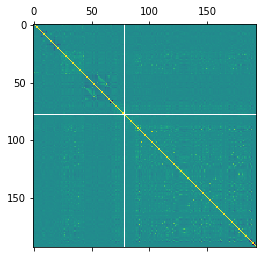

In [102]:
import matplotlib.pyplot as plt

plt.matshow(corr)

In [103]:
reset_data.corr().unstack().sort_values(ascending=False).dropna()

Transgender                                                            Transgender                                                              1.000000
Cassandra                                                              Cassandra                                                                1.000000
TypeScript                                                             TypeScript                                                               1.000000
VB.NET                                                                 VB.NET                                                                   1.000000
VBA                                                                    VBA                                                                      1.000000
Visual Basic 6                                                         Visual Basic 6                                                           1.000000
Amazon DynamoDB                                                        Amazon Dyna

In [104]:
# done for now, still working on this